# COGS 108 - Final Project

# Names

*   Naval Patel
*   Ray Zhou
*   Nathaniel Satriya
*   Yoomin Oh
*   Jennifer Nunez


<a id='research_question'></a>
# Research Question

Is there a correlation between population density (people per square mile) and depression per capita and square mile in the State of California between the years 2000-2020?



# Background & Prior Work

Depression is a serious and widespread mental health issue that plagues people all over the world. Currently, depression rates worldwide are at about 4.4%; in the U.S., it's at about 5.9%<sup>[1](https://worldpopulationreview.com/country-rankings/depression-rates-by-country)</sup>, and the rates seem to be increasing&#8212;especially for younger populations<sup>[2](https://www.publichealth.columbia.edu/public-health-now/news/depression-rise-us-especially-among-young-teens)</sup>.
<br></br>
There have been many scientific inquiries into the causes of depression and the environmental risk factors that may play a role in its development. Of particular interest to us is how population density may be associated with depression. As college students, we have all recently had to move and adapt to a very specific and highly populated environment that, in many ways, does not match what we are used to.
<br></br>
As such, we are interested in investigating how population density, which may affect factors like social interactions, loneliness, emotional health, and more, might influence mental health. There are a few studies that have already  looked at the related topic of urbanization, though many of them have disagreeing perspectives on how it affects depression.
<br></br>
One such study collected medical data from patients in Spain and conducted a linear regression data analysis which found support for urbanization as one environmental factor that may contribute to greater prevalence of depression (<sup>[3](https://doi.org/10.3389/fpsyg.2018.02182)</sup>Llorente et al., 2018). A longitudinal study of depression among older people in China (<sup>[4](https://doi.org/10.1177/0046958020965470)</sup>He et al., 2020) and a study of the Swedish population (<sup>[5](https://doi.org/10.1192/bjp.184.4.293)</sup>Sundquist et al., 2018) concluded similar results; namely, that urbanization and high population density are associated with higher rates of depression and other mental health disorders.
<br></br>
Conversely, a UCLA study used data from U.S. cities to create a multidimensional statistical model (much like the Spanish study mentioned above) to predict depression rates, and found evidence that larger cities were actually associated with lower depression rates (<sup>[6](https://doi.org/10.1073/pnas.2022472118)</sup>Stier et al., 2021). Overall, a literature review of studies on cities and mental health concluded that while cities tend to see higher rates of depression than rural areas, urban cities are also associated with other factors like socioeconomic status and better healthcare access that may confound the results (<sup>[7](https://doi.org/10.3238/arztebl.2017.0121)</sup>Gruebner et al., 2017).
<br></br>
***ADD MORE HERE***
<br></br>
References:
1. https://worldpopulationreview.com/country-rankings/depression-rates-by-country
1. https://www.publichealth.columbia.edu/public-health-now/news/depression-rise-us-especially-among-young-teens
1. https://doi.org/10.3389/fpsyg.2018.02182
1. https://doi.org/10.1177/0046958020965470
1. https://doi.org/10.1192/bjp.184.4.293
1. https://doi.org/10.1073/pnas.2022472118
1. https://doi.org/10.3238/arztebl.2017.0121

# Hypothesis

We hypothesize that depression rates (i.e., proportion of a population affected by depression) will increase as population density increases.
<br></br>
As anecdotal evidence, we have noticed that socialization often takes a less personal and less fulfilling form when interacting with a larger group of people. Thus, living in a higher population density might worsen feelings of isolation or dissatisfaction in life, which could contribute to higher rates of depression (and other mental health issues).
<br></br>
From our background research, we know that there is conflicting evidence on this topic. Different researchers have associated urbanization with both higher and lower rates of depression. However, on the whole, we still predict that an environment with high population *density* (as opposed to a city with high total population or development) will negatively impact individuals' mental health on a collective scale.

# Datasets

To help answer our question, we needed datasets that had a lot of structure and consistency over a large area and long period of time. To that end, we specifically searched for government census data and regional medical data.

The primary variables we needed for our analysis were time, region, population density (or population size + area of region), and rates or incidences of depression. Datasets from SAMHSA, the census, and LA County medical data supplied us with this information.

1. Dataset name: Historical Population Density Data (1910-2020)

*   Link: https://www.census.gov/data/tables/time-series/dec/density-data-text.html
*   Number of Observations: 684
*  This data provides the changing resident populations of each state in the US over 12 decades and ranks them based on their population density. Density is measured as the average population per square mile. According to the US Census Bureau, density levels have been higher across the Eastern sea and pacific coastline and lower in most of the West.
<br></br>

2. Dataset name: County Population Totals: 2010-2019 (California) 
*   Link: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html
*   Number of Observations: 58
* This provides the annual population estimates for each county in California from 2010 to 2019.
<br></br>

3. Dataset name: California Individuals by mental health diagnosis, gender, age, race, ethnicity and veteran status: Number, 2014-2019
*  Link:https://www.samhsa.gov/data/sites/default/files/reports/rpt35253/MHCLD-2019-R-FINAL.pdf
*   Number of Observations: 10
* This table was pulled from the 2019 Mental Health Client-Level Data (MH-CLD) Annual Report by SAMHSA, the agency within the U.S Department of Health and Human Services. Specifically, it provides information reported from state administrative data systems on: mental health diagnoses, mental health treatment settings, and demographic and substance use characteristics of individuals in mental health treatment facillities. Since our state of interest is California we pulled a relevant table from this report.
<br></br>

4. Dataset name: Diagnosed Depression (Ever) in LA county
* Link:http://publichealth.lacounty.gov/ha/HA_DATA_TRENDS.htm
* Number of Observations: 27
* This dataset provides estimates of depression diagnoses in health districts part of Los Angeles county jurisdiction, from 1999 to 2018. It contains other information about race, ethnicity, age group, poverty level, gender and education. The county of LA notes: "We are happy to provide the following data from the 2018 Los Angeles County Health Survey. Please note that the disparities seen in the results for the different groups shown in the table are to a large degree driven by inequities in the social, economic, and environmental conditions experienced by these groups."
<br></br>

5. Dataset name: 
General Population Cities & Unincorporated Communities
Los Angeles County (1990 through 2020 Census)
* Link: http://www.laalmanac.com/population/po03.php
* Number of Observations: 142
* Population estimates for cities in LA county sourced from Census data.

# Setup

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import io
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from functools import reduce
from  matplotlib.ticker import FuncFormatter
from scipy import stats
#from pdfminer.high_level import extract_text
import os
import warnings

# Data Cleaning

In general, each dataset was standardized by changing values and headers to lowercase and stripping them of whitespace and punctuation. We also dropped empty values where necessary and justified.

In [3]:
# Standardization functions
def remove_comma(output):
  if "," in output:
    output = output.replace(',', '')   
  return output

def remove_period(str_in):
  output = str_in
  try:
    output = str_in.lower()
    output = output.replace('.', '')
  except:
    output = str_in
    print("error")
  return output

def remove_dash(output):
  if "-" in output:
    output = output.replace('-','')
  return output

def remove_asterik(output):
  if "*" in output:
    output = output.replace('*', '')  
  return output

def remove_date(astr):
  return int(astr.replace("-01-01 00:00:00",""))

* Census data was fairly tidy already, but it included a lot of unecessary variables, so we filtered everything to focus on California observations starting from the years 2000 and forward.

* To narrow our focus we decided to extract California population counts and estimates. We will use this dataset to compare California mental health case estimates over the years 2000 to 2020.

In [4]:
# reading Historical Population Density Data (1910-2020) data from github 

population_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/apportionment.csv'
df1 = pd.read_csv(population_url)   # Original shape of this data, starting from 1910, is (684,10)                                   

# Drop all years except for 2000-2020
pop = df1.loc[(df1['Year'] >= 2000)]
#pop.shape                                        # After filtering it to only contain the 2000s the shape is (171,10)

# Focus on states and drop observations with Regions & Nations 
population = pop[pop['Geography Type'].str.contains("State")]

# Create a dataframe that focuses on the states & rename 'Geography Type' column to 'State'
population = population.rename(columns={'Name': 'name', 'Geography Type':'state', 'Year': 'year', 'Resident Population': 'res_pop_count', 'Percent Change in Resident Population': 'perc_change_res_pop', 'Resident Population Density': 'res_pop_density', 'Resident Population Density Rank': 'res_pop_density_rank'})
population = population.drop(population.columns[7:10], axis=1)
population = population.replace(',', '', regex=True)
population = population.astype({"res_pop_count": int, "perc_change_res_pop": float, "res_pop_density": float, "res_pop_density_rank": float})
# Filtered all states except California
population = population[population.name == 'California']
population = population.reset_index(drop=True)
population['state'] = population['state'].str.lower()
population['name'] = population['name'].str.lower()
population.head()


,name,state,year,res_pop_count,perc_change_res_pop,res_pop_density,res_pop_density_rank
0,california,state,2000,33871648,13.8,217.4,14.0
1,california,state,2010,37253956,10.0,239.1,13.0
2,california,state,2020,39538223,6.1,253.7,13.0


* The counties dataset needed all of its columns to be renamed to their respective variables.
* Initially we aimed to work with all counties in California, but based on available data we narrowed our scope to Los Angeles County. 

In [5]:
# California counties population totals from 2010-2019

counties_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/CA_counties_pop.csv'
df3 = pd.read_csv(counties_url)

# rename columns
df3 = df3.rename(columns={'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)': 'county',
                          'Unnamed: 1':'census', 'Unnamed: 2': 'estimates',
                          'Unnamed: 3': '2010',
                          'Unnamed: 4': '2011',
                          'Unnamed: 5': '2012',
                          'Unnamed: 6': '2013', 'Unnamed: 7': '2014',
                          'Unnamed: 8': '2015', 'Unnamed: 9': '2016',
                          'Unnamed: 10': '2017', 'Unnamed: 11': '2018',
                          'Unnamed: 12': '2019'})
# drop unneeded rows
df3.drop(
    labels = [0,1,2,62,63,64,65,66],
    axis = 0,
    inplace=True
)
df3 = df3.reset_index(drop=True)

# standardize county names to lowercase and remove unecessary punctuations
df3['county'] = df3['county'].apply(remove_period)
#Remove state
df3['county'] = df3['county'].apply(lambda str_in: str_in.replace(', california', ''))
#Remove commas
df3 = df3.applymap(lambda str_in: str_in.replace(',', ''))
df3.drop(labels = 0, axis=0, inplace = True)

#iterate remove_comma function to columns
for i in range(0,10):
  temp = 2010 + i
  temp = str(temp)
  df3[temp] = df3[temp].apply(remove_comma)
df3['census'] = df3['census'].apply(remove_comma)
df3['estimates'] = df3['estimates'].apply(remove_comma)

# store la county information in its own variable
la_pop = df3.loc[df3['county'] == 'los angeles county']
la_pop

,county,census,estimates,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
19,los angeles county,9818605,9819968,9823246,9876482,9935375,9992484,10040072,10085416,10105708,10103711,10073906,10039107


* Mental health data for the state of California was extracted from SAMHSA report and rewritten as a csv file using the tabulate method. 
* Columns were renamed for better understandability and values were standardized.

In [6]:
from pandas.core.arrays import string_
# California individuals counted by type of mental health diagnosis through the years 2014-2019

box = [1,2,7,9]                            # Table measurements from PDF document [top, left, bottom, width]
cm_to_pdf = 28.28                          # Converts our margin measurements from cm to pdf points
for i in range(0,len(box)):
  box[i] *= cm_to_pdf
mh_url = 'https://www.samhsa.gov/data/sites/default/files/reports/rpt35253/MHCLD-2019-R-FINAL.pdf'
# mh_disorders = tabula.read_pdf(mh_url, pages='438').      # Using tabulate to read pdf
# *Convert this tabulated data to CSV (This portion will be commented out for faster shell processing)
# tabula.convert_into(mh_url, "mh.csv", pages="438", output_format="csv", stream=True)
# !cat mh.csv 

mh_url2 = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/mh.csv'
mh_disorders = pd.read_csv(mh_url2)

# rename columns
mh_disorders = mh_disorders.rename(columns={'Selected characteristics': 'disorder_type',
                          'Unnamed: 1':'totals', '2014': '2014',
                          '2015': '2015', '2016': '2016',
                          '2017': '2017', '2018': '2018',
                          '2019': '2019'})
mh_disorders = mh_disorders.iloc[0:13, :]

# Make gender into its own df  *may delete
mh_genders = mh_disorders.iloc[13:17, :] 

# Make age its own df *may delete
mh_ages = mh_disorders.iloc[18:33, :]

# Clean NaN values for disorder types df
mh_disorders = mh_disorders.drop('totals',1)
mh_disorders = mh_disorders.dropna(axis=0)
mh_disorders = mh_disorders.reset_index(drop=True)

#iterate remove_comma function to columns
for i in range(0,6):
  temp = 2014 + i
  temp = str(temp)
  mh_disorders[temp] = mh_disorders[temp].apply(remove_comma)

def remove_dash(output):
  if "-" in output:
    output = output.replace('-','')
  return output

mh_disorders['disorder_type'] = mh_disorders['disorder_type'].str.lower()
mh_disorders['disorder_type'] = mh_disorders['disorder_type'].apply(remove_dash)
mh_disorders


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,disorder_type,2014,2015,2016,2017,2018,2019
0,total individuals,697180,695815,647328,638394,708521,742725
1,trauma and stressorrelated disorders,107725,111807,105263,95751,110463,119469
2,anxiety disorders,75243,82479,81052,89225,109679,114954
3,attention deficit/hyperactivity disorder,52189,51489,47165,46369,49613,48632
4,mood disorders,308348,309996,271061,196965,243123,261427
5,bipolar disorders,113612,112390,99012,51718,60772,62227
6,depressive disorders,196785,199698,173975,146363,183711,200791
7,personality disorders,24234,23816,21994,14570,12654,10520
8,psychotic disorders,126411,126516,116156,116861,137630,137726
9,alcohol or substancerelated disorders,113129,112757,92537,64358,70782,68319


* Irrelevant information was removed and columns were renamed for better understanding.
* Standardized and converted to numerical values

In [7]:
# Los Angeles mental health data of people diagnosed with depression (ever)
la_url = 'https://raw.githubusercontent.com/jennynunez/032-DATA/main/la_demos_cleaned.csv'
df4 = pd.read_csv(la_url, index_col=0)
# We want to drop the index name because it is not useful
df4.index.name = None
# We will now reset the index column and removing unhelpful values
df4 = df4.T.reset_index().reset_index(drop=True)
# Renaming columns that have incorrect labels
df4 = df4.rename(columns={'index': 'year'})
# Removing percentage symbol throughout the DataFrame
df4 = df4.replace('%', '', regex=True)
# Convering DataFrame to numeric values
df4 = df4.apply(pd.to_numeric)
# Properly formatting years in datetime format so Seaborn doesn't convert the years to floats
df4['year'] = pd.to_datetime(df4.year.astype(str), format="%Y")
# Renaming 'LA Overall' column to be more descriptive about what the data is telling us
overall = df4.rename(columns={'LA Overall': 'population_depression_diagnosis_percent'})
# The overall LA county data is in the first few rows so we are using a subset of the data
overall = overall.iloc[:, 0:2]
df4


,year,LA Overall,Alhambra,Antelope Valley,Bellflower,Central,Compton,East LA,East Valley,El Monte,...,Pomona,San Antonio,San Fernando,South,Southeast,Southwest,Torrance,West,West Valley,Whittier
0,2018-01-01,16.5,11.2,18.4,18.2,13.9,15.5,12.5,14.0,14.6,...,10.9,21.5,15.7,13.1,14.5,19.7,19.9,23.0,15.8,13.2
1,2015-01-01,13.0,9.7,19.2,13.8,20.0,12.2,12.4,13.5,6.2,...,10.2,11.6,14.6,14.8,12.0,10.3,11.6,15.2,10.8,12.7
2,2011-01-01,12.2,7.1,14.6,12.8,10.6,10.1,16.3,11.9,5.4,...,14.9,8.6,13.7,16.3,9.5,9.4,9.6,13.4,12.8,11.4
3,2007-01-01,13.6,9.1,17.1,10.7,15.4,12.7,15.2,13.6,12.3,...,14.2,14.2,11.2,12.8,18.7,12.4,13.7,13.2,12.4,14.5
4,2005-01-01,12.9,10.2,15.7,11.3,13.0,13.2,16.6,13.9,14.2,...,9.7,11.4,10.7,16.8,6.9,11.7,10.5,16.6,14.0,15.3
5,2002-01-01,9.7,8.3,9.2,8.8,8.8,5.4,8.1,12.4,5.4,...,8.6,9.5,8.9,6.7,10.1,7.1,10.4,11.7,11.2,12.0
6,1999-01-01,8.8,5.7,9.7,7.0,9.2,4.8,9.0,8.5,5.7,...,6.7,9.2,5.7,8.9,6.2,7.9,10.0,8.8,13.0,9.7


* For LA cities populations (based on their zipcode), we scraped a web page that compiled a table sourced from the Census Bureau data. This required reading in the data with the BeautifulSoup and requests libraries in order to create a clean pandas dataframe.
* Filtered to only include cities existing from 1990 and onwards, since our mental health data consists of these cities
* Standardized using previously made functions
* All estimates made numeric
* Combined with  LA depression diagnosis (ever) dataset (d4)

In [8]:
# Districts in LA county populations
# First use BeautifulSoup to scrape the table data and convert to pandas dataframe
la_pop_url = 'http://www.laalmanac.com/population/po03.php'
r = requests.get(la_pop_url)
soup = BeautifulSoup(r.content, 'lxml')
table = soup.find_all('table')[0]
# remove multi-headers and set relevant column names
pop_est = pd.read_html(str(table), header=None)[0]
pop_est.columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990']

# For newer cities that didn't exist in 1990, we'll remove values that appear as "---(2)"
pop_est = pop_est[(pop_est['pop_2000'] != "---(2)")]
pop_est = pop_est[(pop_est['pop_1990'] != "---(3)")] # reduced size to 129 cities
pop_est = pop_est.iloc[1: , :]
pop_est = pop_est.reset_index(drop=True)


# Standardize to remove " * or - " and make cities lowercase
def remove_asterik(output):
  if "*" in output:
    output = output.replace('*', '')  
  return output
pop_est['city'] = pop_est['city'].apply(remove_asterik)
pop_est['city'] = pop_est['city'].str.lower()
pop_est['city'] = pop_est['city'].apply(remove_dash)
# Make all estimates numeric
pop_est[['pop_2020', 'pop_2010', 'pop_2000', 'pop_1990']] = pop_est[['pop_2020', 'pop_2010', 'pop_2000', 'pop_1990']].apply(pd.to_numeric)

pop_est

,city,pop_2020,pop_2010,pop_2000,pop_1990
0,acton,7431,7596,2390,1471
1,agoura hills,20299,20330,20537,20390
2,alhambra,82868,83089,85804,82106
3,alondra park,8569,8592,8622,12215
4,altadena,42846,42777,42610,42658
...,...,...,...,...,...
121,west whittierlos nietos,25325,25540,25129,24164
122,westlake village,8029,8270,8368,7455
123,westmont,33913,31853,31623,31044
124,whittier,87306,85331,83680,77671


In [9]:
# Now we want to filter only the cities that are also recorded from our mental health dataset

# First flip df4 using transpose so cities are row indexes
flipped = df4.transpose()
flipped = flipped.reset_index()
flipped = flipped.iloc[1: , :]
flipped.columns = ['city','mh_2018', 'mh_2015', 'mh_2011', 'mh_2007', 'mh_2005', 'mh_2002', 'mh_1999']
flipped['city'] = flipped['city'].str.lower()
flipped[['mh_2018', 'mh_2015', 'mh_2011', 'mh_2007', 'mh_2005', 'mh_2002', 'mh_1999']] = flipped[['mh_2018', 'mh_2015', 'mh_2011', 'mh_2007', 'mh_2005', 'mh_2002', 'mh_1999']].apply(pd.to_numeric)
# Merge once all values have been made numeric, and city names have been standardized
# Trying merge them together with reduce method 
# df6 = reduce(lambda l, r: pd.merge(flipped, df5, on='city', how='inner'), df5)
# This method brings 11 out of 26 cities we're looking for

# Some missing cities are included but as a different label in df5. Once we identify the missing cities, we'll manually extract, and append to:
missing = pd.DataFrame()

# Antelope Valley mental health cases comprise of 5 cities. We will make a new df with Antelope Valley cities, then sum and reassign these values to this city.
# Antelope Valley (includes 'acton', 'palmdale', 'lancaster', 'lake los angeles', 'quartz hill')
ant_v = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
ant_v = ant_v.append({'city':'acton', 'pop_2020':7431,'pop_2010':7596, 'pop_2000':2390, 'pop_1990':1471}, ignore_index=True)
ant_v = ant_v.append({'city':'palmdale', 'pop_2020':169450,'pop_2010':152750, 'pop_2000':116670, 'pop_1990':68842}, ignore_index=True)
ant_v = ant_v.append({'city':'lancaster', 'pop_2020':173516,'pop_2010':156633, 'pop_2000':118718, 'pop_1990':97291}, ignore_index=True)
ant_v = ant_v.append({'city':'lancaster', 'pop_2020':13187,'pop_2010':12328, 'pop_2000':11523, 'pop_1990':7977}, ignore_index=True)
ant_v = ant_v.append({'city':'quartz hill', 'pop_2020':11447,'pop_2010':10912, 'pop_2000':9890, 'pop_1990':9626}, ignore_index=True)
ant_v = ant_v.set_index('city')
# Now that Antelope Valley's cities are in dataframe, we sum value of columns, and assign values to the missing dataframe
t1 = ant_v.sum()
t1.name = 'antelope valley'
ant_v = ant_v.append(t1) # assigning totals to a row
missing = missing.append({'city':'antelope valley', 'pop_2020':375031,'pop_2010':340219, 'pop_2000':259191, 'pop_1990':185207}, ignore_index=True)
# Now we will do the same for ALL missing cities (Central, East LA, East Valley, Foothill, Harbor, Hollywood/Wilshire, Northeast, San Antonio, South, Southeast, Southwest, west, west valley)

# Central LA (includes: 'los angeles')
cla = pd.DataFrame(columns=['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
cla = cla.append({'city':'central', 'pop_2020':3898747,'pop_2010':3792621, 'pop_2000':3694820, 'pop_1990':3485398}, ignore_index=True)
missing = missing.append({'city':'central', 'pop_2020':3898747,'pop_2010':3792621, 'pop_2000':3694820, 'pop_1990':3485398}, ignore_index=True)

# East LA (includes: 'east los angeles')
ela = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
ela = ela.append({'city':'east los angeles', 'pop_2020':118786,'pop_2010':126496, 'pop_2000':124283, 'pop_1990':126379}, ignore_index=True)
missing = missing.append({'city':'east la', 'pop_2020':118786,'pop_2010':126496, 'pop_2000':124283, 'pop_1990':126379}, ignore_index=True)

# East Valley (includes: 'san fernando','burbank', 'hidden hills')
eva = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
eva = eva.append({'city':'san fernando', 'pop_2020':23946,'pop_2010':23645, 'pop_2000':23564, 'pop_1990':22580}, ignore_index=True)
eva = eva.append({'city':'san fernando', 'pop_2020':107337,'pop_2010':103340, 'pop_2000':100316, 'pop_1990':93643}, ignore_index=True)
eva = eva.append({'city':'hidden hills', 'pop_2020':1725,'pop_2010':1856, 'pop_2000':1875, 'pop_1990':1729}, ignore_index=True)
eva = eva.set_index('city')
t2 = eva.sum()
t2.name = 'east valley'
eva = eva.append(t2)
missing = missing.append({'city':'east valley', 'pop_2020':133008,'pop_2010':128841, 'pop_2000':125755, 'pop_1990':117952},ignore_index=True)

# Foothills (includes: 'san gabirel', 'south san gabriel','east san gabriel', 'south pasadena', 'san marino','east pasadena', 'sierra madre', 'glendora',
# 'san dimas', 'covina','west covina','charter oak', 'walnut', 'la puente', 'valinda', 'vincent', 'monterey park','rosemead','temple city', 'hacienda heights'
# 'rowland heights', 'citrus', 'south el monte', 'avocado heights', 'baldwin park','south san jose hills')
f = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
f = f.append({'city':'san gabriel', 'pop_2020':39568,'pop_2010':39718, 'pop_2000':39804, 'pop_1990':37120}, ignore_index=True)
f = f.append({'city':'south san gabriel', 'pop_2020':7920,'pop_2010':8070, 'pop_2000':7595, 'pop_1990':7700}, ignore_index=True)
f = f.append({'city':'east san gabriel', 'pop_2020':22769,'pop_2010':14874, 'pop_2000':14512, 'pop_1990':12736}, ignore_index=True)
f = f.append({'city':'south pasadena', 'pop_2020':26943,'pop_2010':25619, 'pop_2000':24292, 'pop_1990':23936}, ignore_index=True)
f = f.append({'city':'san marino', 'pop_2020':12513,'pop_2010':13147, 'pop_2000':12945, 'pop_1990':12959}, ignore_index=True)
f = f.append({'city':'east pasadena', 'pop_2020':6021,'pop_2010':6144, 'pop_2000':6045, 'pop_1990':5910}, ignore_index=True)
f = f.append({'city':'sierra madre', 'pop_2020':11268,'pop_2010':10917, 'pop_2000':10578, 'pop_1990':10762}, ignore_index=True)
f = f.append({'city':'glendora', 'pop_2020':52558,'pop_2010':50073, 'pop_2000':49415, 'pop_1990':47828}, ignore_index=True)
f = f.append({'city':'san dimas', 'pop_2020':34924,'pop_2010':33371, 'pop_2000':34980, 'pop_1990':32397}, ignore_index=True)
f = f.append({'city':'covina', 'pop_2020':51268,'pop_2010':47796, 'pop_2000':46837, 'pop_1990':43207}, ignore_index=True)
f = f.append({'city':'west covina', 'pop_2020':109501,'pop_2010':106098, 'pop_2000':105080, 'pop_1990':96086}, ignore_index=True)
f = f.append({'city':'charter oak', 'pop_2020':9739,'pop_2010':9310, 'pop_2000':9027, 'pop_1990':8858}, ignore_index=True)
f = f.append({'city':'walnut', 'pop_2020':28430,'pop_2010':29172, 'pop_2000':30004, 'pop_1990':29105}, ignore_index=True)
f = f.append({'city':'la puente', 'pop_2020':38062,'pop_2010':39816, 'pop_2000':41063, 'pop_1990':36955}, ignore_index=True)
f = f.append({'city':'valinda', 'pop_2020':22437,'pop_2010':22822, 'pop_2000':46837, 'pop_1990':18735}, ignore_index=True)
f = f.append({'city':'vincent', 'pop_2020':15714,'pop_2010':15922, 'pop_2000':15097, 'pop_1990':13713}, ignore_index=True)
f = f.append({'city':'monterey park', 'pop_2020':61096,'pop_2010':60269, 'pop_2000':60051, 'pop_1990':60738}, ignore_index=True)
f = f.append({'city':'rosemead', 'pop_2020':51185,'pop_2010':53764, 'pop_2000':53505, 'pop_1990':51638}, ignore_index=True)
f = f.append({'city':'temple city', 'pop_2020':36494,'pop_2010':35558, 'pop_2000':33377, 'pop_1990':31100}, ignore_index=True)
f = f.append({'city':'hacienda heights', 'pop_2020':54191,'pop_2010':54038, 'pop_2000':53122, 'pop_1990':52354}, ignore_index=True)
f = f.append({'city':'rowland heights', 'pop_2020':54191,'pop_2010':54038, 'pop_2000':53122, 'pop_1990':52354}, ignore_index=True)
f = f.append({'city':'citrus', 'pop_2020':10243,'pop_2010':10866, 'pop_2000':10581, 'pop_1990':9481}, ignore_index=True)
f = f.append({'city':'south el monte', 'pop_2020':19567,'pop_2010':20116, 'pop_2000':21144, 'pop_1990':20850}, ignore_index=True)
f = f.append({'city':'avocado heights', 'pop_2020':13317,'pop_2010':15411, 'pop_2000':15148, 'pop_1990':14232}, ignore_index=True)
f = f.append({'city':'baldwin park', 'pop_2020':72176,'pop_2010':75390, 'pop_2000':75837, 'pop_1990':69330}, ignore_index=True)
f = f.append({'city':'south san jose hills', 'pop_2020':19855,'pop_2010':20551, 'pop_2000':20218, 'pop_1990':17814}, ignore_index=True)
f = f.set_index('city')
t3 = f.sum()
t3.name = 'foothill'
f = f.append(t3)
missing = missing.append({'city':'foothill', 'pop_2020':881950,'pop_2010':872870, 'pop_2000':890216, 'pop_1990':817898},ignore_index=True)

# Harbor (includes: 'carson','west carson', 'long beach', 'lakewood','hawaiian gardens', 'signal hill')
h = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
h = h.append({'city':'carson', 'pop_2020':95558,'pop_2010':91714, 'pop_2000':89730, 'pop_1990':83995}, ignore_index=True)
h = h.append({'city':'west carson', 'pop_2020':22870,'pop_2010':21699, 'pop_2000':21138, 'pop_1990':20143}, ignore_index=True)
h = h.append({'city':'long beach', 'pop_2020':466742,'pop_2010':462257, 'pop_2000':461522, 'pop_1990':429433}, ignore_index=True)
h = h.append({'city':'lakewood', 'pop_2020':82496,'pop_2010':80048, 'pop_2000':79345, 'pop_1990':73557}, ignore_index=True)
h = h.append({'city':'hawaiian gardens', 'pop_2020':14149,'pop_2010':14254, 'pop_2000':14779, 'pop_1990':13639}, ignore_index=True)
h = h.append({'city':'signal hill', 'pop_2020':11848,'pop_2010':11016, 'pop_2000':9333, 'pop_1990':8371}, ignore_index=True)
h = h.set_index('city')
t4 = h.sum()
t4.name = 'harbor'
h = h.append(t4)
missing = missing.append({'city':'harbor', 'pop_2020':693663,'pop_2010':680988, 'pop_2000':675847, 'pop_1990':629138},ignore_index=True)

# West (include: 'west hollywood', 'beverly hills', 'santa monica', 'ladera heights', 'marina del rey','culver city',)
w = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
w = w.append({'city':'west hollywood', 'pop_2020':35757,'pop_2010':34399, 'pop_2000':35716, 'pop_1990':36118}, ignore_index=True)
w = w.append({'city':'beverly hills', 'pop_2020':32701,'pop_2010':34109, 'pop_2000':33784, 'pop_1990':31971}, ignore_index=True)
w = w.append({'city':'santa monica', 'pop_2020':93076,'pop_2010':89736, 'pop_2000':84084, 'pop_1990':86905}, ignore_index=True)
w = w.append({'city':'ladera heights', 'pop_2020':6654,'pop_2010':6498, 'pop_2000':6568, 'pop_1990':6316}, ignore_index=True)
w = w.append({'city':'marina del rey', 'pop_2020':11373,'pop_2010':8866, 'pop_2000':8176, 'pop_1990':7431}, ignore_index=True)
w = w.append({'city':'culver city', 'pop_2020':40779,'pop_2010':38883, 'pop_2000':38816, 'pop_1990':38793}, ignore_index=True)
w = w.set_index('city')
t5 = w.sum()
t5.name = 'west'
w = w.append(t5)
missing = missing.append({'city':'west', 'pop_2020':220340,'pop_2010':212491, 'pop_2000':207144, 'pop_1990':207534},ignore_index=True)

# South (includes: 'view park windsor hills', 'westmont','west athens', 'willowbrook','florencegraham')
s = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
s = s.append({'city':'view park windsor hills', 'pop_2020':11419,'pop_2010':11075, 'pop_2000':10958, 'pop_1990':11769}, ignore_index=True)
s = s.append({'city':'westmont', 'pop_2020':33913,'pop_2010':31853, 'pop_2000':31623, 'pop_1990':31044}, ignore_index=True)
s = s.append({'city':'west athens', 'pop_2020':9393,'pop_2010':8729, 'pop_2000':9101, 'pop_1990':8859}, ignore_index=True)
s = s.append({'city':'willowbrook', 'pop_2020':24295,'pop_2010':35983, 'pop_2000':34138, 'pop_1990':32772}, ignore_index=True)
s = s.append({'city':'florence graham', 'pop_2020':61983,'pop_2010':63387, 'pop_2000':60197, 'pop_1990':57147}, ignore_index=True)
s = s.set_index('city')
t6 = s.sum()
t6.name = 'south'
s = s.append(t6)
missing = missing.append({'city':'south', 'pop_2020':141003,'pop_2010':151027, 'pop_2000':146017, 'pop_1990':141591},ignore_index=True)

# Southeast (include:'artesia','vernon', 'bellflower','downey', 'south gate', 'bell','cudahy','bell gardens', 'huntington park',
# 'la mirada', 'santa fe springs','maywood','norwalk','paramount','south whittier', 'pico rivera','montebello','commerce','cerritos',
# 'east whitter (formerly east la mirada)'
se = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
se = se.append({'city':'artesia', 'pop_2020':16395,'pop_2010':16522, 'pop_2000':16380, 'pop_1990':15464}, ignore_index=True)
se = se.append({'city':'vernon', 'pop_2020':222,'pop_2010':112, 'pop_2000':91, 'pop_1990':152}, ignore_index=True)
se = se.append({'city':'bellflower', 'pop_2020':79190,'pop_2010':76616, 'pop_2000':72878, 'pop_1990':61815}, ignore_index=True)
se = se.append({'city':'downey', 'pop_2020':114355,'pop_2010':111772, 'pop_2000':107323, 'pop_1990':91444}, ignore_index=True)
se = se.append({'city':'south gate', 'pop_2020':92726,'pop_2010':94396, 'pop_2000':96375, 'pop_1990':86284}, ignore_index=True)
se = se.append({'city':'bell', 'pop_2020':33559,'pop_2010':35477, 'pop_2000':36664, 'pop_1990':34365}, ignore_index=True)
se = se.append({'city':'cudahy', 'pop_2020':22811,'pop_2010':23805, 'pop_2000':24208, 'pop_1990':22817}, ignore_index=True)
se = se.append({'city':'bell gardens', 'pop_2020':39501,'pop_2010':42072, 'pop_2000':44054, 'pop_1990':42355}, ignore_index=True)
se = se.append({'city':'huntington park', 'pop_2020':54883,'pop_2010':58114, 'pop_2000':61348, 'pop_1990':56065}, ignore_index=True)
se = se.append({'city':'la mirada', 'pop_2020':48008,'pop_2010':48527, 'pop_2000':46783, 'pop_1990':40452}, ignore_index=True)
se = se.append({'city':'santa fe springs', 'pop_2020':19219,'pop_2010':16223, 'pop_2000':17438, 'pop_1990':15520}, ignore_index=True)
se = se.append({'city':'maywood', 'pop_2020':25138,'pop_2010':27395, 'pop_2000':28083, 'pop_1990':27850	}, ignore_index=True)
se = se.append({'city':'norwalk', 'pop_2020':102773,'pop_2010':105549, 'pop_2000':103298, 'pop_1990':94279	}, ignore_index=True)
se = se.append({'city':'paramount', 'pop_2020':53733,'pop_2010':54098, 'pop_2000':55266, 'pop_1990':47669	}, ignore_index=True)
se = se.append({'city':'south whittier', 'pop_2020':56415,'pop_2010':57156, 'pop_2000':55193, 'pop_1990':49514	}, ignore_index=True)
se = se.append({'city':'pico rivera', 'pop_2020':62088,'pop_2010':62942, 'pop_2000':63428, 'pop_1990':59177	}, ignore_index=True)
se = se.append({'city':'montebello', 'pop_2020':62640,'pop_2010':62500, 'pop_2000':62150, 'pop_1990':59564	}, ignore_index=True)
se = se.append({'city':'commerce', 'pop_2020':12378,'pop_2010':12823, 'pop_2000':12568, 'pop_1990':12135	}, ignore_index=True)
se = se.append({'city':'cerritos', 'pop_2020':49578,'pop_2010':49041, 'pop_2000':51488, 'pop_1990':53240	}, ignore_index=True)
se = se.append({'city':'east whitter (formerly east la mirada)', 'pop_2020':10394,'pop_2010':9757, 'pop_2000':9538, 'pop_1990':9367	}, ignore_index=True)
se = se.set_index('city')
t7 = se.sum()
t7.name = 'southeast'
se = se.append(t7)
missing = missing.append({'city':'southeast', 'pop_2020':956006,'pop_2010':964897, 'pop_2000':964554, 'pop_1990':879528},ignore_index=True)

# Southwest (include:'manhattan beach','torrance','inglewood','gardena','lennox','el segundo','hawthorne','redondo beach','lawndale'
# 'hermosa beach','rolling hills estates','palo verde estates','rancho palos verdes','lomita','alondra park')
sw = pd.DataFrame(columns = ['city', 'pop_2020', 'pop_2010', 'pop_2000', 'pop_1990'])
sw = sw.append({'city':'manhattan beach', 'pop_2020':35506,'pop_2010':35135, 'pop_2000':33852, 'pop_1990':32063	}, ignore_index=True)
sw = sw.append({'city':'torrance', 'pop_2020':147067,'pop_2010':145438, 'pop_2000':137946, 'pop_1990':133107}, ignore_index=True)
sw = sw.append({'city':'inglewood', 'pop_2020':107762,'pop_2010':109673, 'pop_2000':112580, 'pop_1990':109602	}, ignore_index=True)
sw = sw.append({'city':'gardena', 'pop_2020':61027,'pop_2010':58829, 'pop_2000':57746, 'pop_1990':49847	}, ignore_index=True)
sw = sw.append({'city':'lennox', 'pop_2020':20323,'pop_2010':22753, 'pop_2000':22950, 'pop_1990':22757	}, ignore_index=True)
sw = sw.append({'city':'el segundo', 'pop_2020':17272,'pop_2010':16654, 'pop_2000':16033, 'pop_1990':15223	}, ignore_index=True)
sw = sw.append({'city':'hawthorne', 'pop_2020':88083,'pop_2010':84293, 'pop_2000':84112	, 'pop_1990':71349	}, ignore_index=True)
sw = sw.append({'city':'redondo beach', 'pop_2020':71576,'pop_2010':66748, 'pop_2000':63261, 'pop_1990':60167	}, ignore_index=True)
sw = sw.append({'city':'lawndale', 'pop_2020':31807,'pop_2010':32769, 'pop_2000':31711, 'pop_1990':27331	}, ignore_index=True)
sw = sw.append({'city':'hermosa beach', 'pop_2020':19728,'pop_2010':19506, 'pop_2000':18566, 'pop_1990':18219	}, ignore_index=True)
sw = sw.append({'city':'rolling hills estates', 'pop_2020':8280,'pop_2010':8067, 'pop_2000':7676, 'pop_1990':7789	}, ignore_index=True)
sw = sw.append({'city':'palos verdes estates', 'pop_2020':13347,'pop_2010':13438, 'pop_2000':13340, 'pop_1990':13512	}, ignore_index=True)
sw = sw.append({'city':'rancho palos verdes', 'pop_2020':42287,'pop_2010':41643, 'pop_2000':41145, 'pop_1990':41659	}, ignore_index=True)
sw = sw.append({'city':'lomita', 'pop_2020':20921,'pop_2010':20256, 'pop_2000':20046, 'pop_1990':19382	}, ignore_index=True)
sw = sw.append({'city':'alondra park', 'pop_2020':8569,'pop_2010':8592, 'pop_2000':8622, 'pop_1990':12215	}, ignore_index=True)
sw = sw.set_index('city')
t8 = sw.sum()
t8.name = 'southwest'
sw = sw.append(t8)
missing = missing.append({'city':'southwest', 'pop_2020':693555,'pop_2010':683794, 'pop_2000':669586, 'pop_1990':634222},ignore_index=True)

# Make all estimates numeric
missing[['pop_2020', 'pop_2010', 'pop_2000', 'pop_1990']] = missing[['pop_2020', 'pop_2010', 'pop_2000', 'pop_1990']].apply(pd.to_numeric)
# DROPPING: HOLLYWOOD/WILSHIRE, CENTRAL, WEST VALLEY, SAN ANTONIO, NORTHEAST (alternative is to find data from census through zipcodes)
warnings.filterwarnings('ignore') # Many warning errors arose later on from using append method since pandas is deprecating it and moving to concat 
missing

,city,pop_2020,pop_2010,pop_2000,pop_1990
0,antelope valley,375031.0,340219.0,259191.0,185207.0
1,central,3898747.0,3792621.0,3694820.0,3485398.0
2,east la,118786.0,126496.0,124283.0,126379.0
3,east valley,133008.0,128841.0,125755.0,117952.0
4,foothill,881950.0,872870.0,890216.0,817898.0
5,harbor,693663.0,680988.0,675847.0,629138.0
6,west,220340.0,212491.0,207144.0,207534.0
7,south,141003.0,151027.0,146017.0,141591.0
8,southeast,956006.0,964897.0,964554.0,879528.0
9,southwest,693555.0,683794.0,669586.0,634222.0


* Now that the missing cities data has been found and placed in a dataframe, we can concatenate it to the dataframe with all of the cities population estimates (pop_est). This updated list will be merged with the mental health cases per region (flipped). This combined dataset will be used to check if a relationship exists between mental health disorders and population, and how that may have changed over the years.
* Renamed city label to district, since we now know the mental health dataset terminology was by health districts.
* *Note that some of the regions were dropped during the merge because the data was limited, and there was insufficient information to include it. These regions were: Hollywood/Wilshire, West Valley, San Antonio, Northeast

In [10]:
# Concatenate missing data to combined dataset
pop_est = pd.concat([missing,pop_est])
pop_est = pop_est.reset_index(drop=True)
# Merge at the end
districts_health = reduce(lambda l, r: pd.merge(flipped, pop_est, on='city', how='left'), pop_est)
districts_health = districts_health.rename(columns={'city':'district'})
districts_health = districts_health.dropna()
districts_health = districts_health.reset_index(drop=True)
districts_health

,district,mh_2018,mh_2015,mh_2011,mh_2007,mh_2005,mh_2002,mh_1999,pop_2020,pop_2010,pop_2000,pop_1990
0,alhambra,11.2,9.7,7.1,9.1,10.2,8.3,5.7,82868.0,83089.0,85804.0,82106.0
1,antelope valley,18.4,19.2,14.6,17.1,15.7,9.2,9.7,375031.0,340219.0,259191.0,185207.0
2,bellflower,18.2,13.8,12.8,10.7,11.3,8.8,7.0,79190.0,76616.0,72878.0,61815.0
3,central,13.9,20.0,10.6,15.4,13.0,8.8,9.2,3898747.0,3792621.0,3694820.0,3485398.0
4,compton,15.5,12.2,10.1,12.7,13.2,5.4,4.8,95740.0,96455.0,93493.0,90454.0
5,east la,12.5,12.4,16.3,15.2,16.6,8.1,9.0,118786.0,126496.0,124283.0,126379.0
6,east valley,14.0,13.5,11.9,13.6,13.9,12.4,8.5,133008.0,128841.0,125755.0,117952.0
7,el monte,14.6,6.2,5.4,12.3,14.2,5.4,5.7,109450.0,113475.0,115965.0,106209.0
8,foothill,14.1,12.5,13.7,12.4,11.1,11.7,10.9,881950.0,872870.0,890216.0,817898.0
9,glendale,19.3,12.1,19.2,18.2,11.5,7.9,8.2,196543.0,191719.0,194973.0,180038.0


# Data Analysis

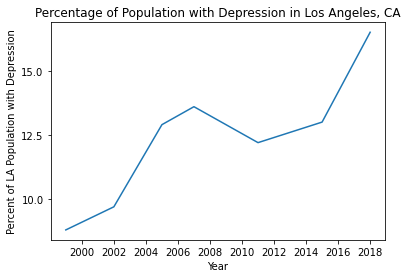

In [11]:
# Graphing Percentage of Population with Depression in Los Angeles, CA using Seaborn lineplot and renaming axes to be more descriptive
sns.lineplot(data=overall, x='year', y='population_depression_diagnosis_percent').set(
    title="Percentage of Population with Depression in Los Angeles, CA", xlabel="Year", ylabel="Percent of LA Population with Depression")
sns.set(style='white', font_scale=2)

The figure above is a line chart displaying the percent of the population in Los Angeles, CA that has a diagnosis of depression in a particular year. Although there was a brief decline in the percent of the LA population diagnosed with depression between 2007 and 2011, the overall trend has been a significant overall increase from about 9% of the population in 2000 to over 16% of the population in 2018.
<br></br>
Below we have graphed a more thorough breakdown of depression rates by district in LA over time. The legend is not provided because of the number of districts; the main point we see from this graph is that depression rates have generally been increasing over time for nearly all of LA's healthcare districts.

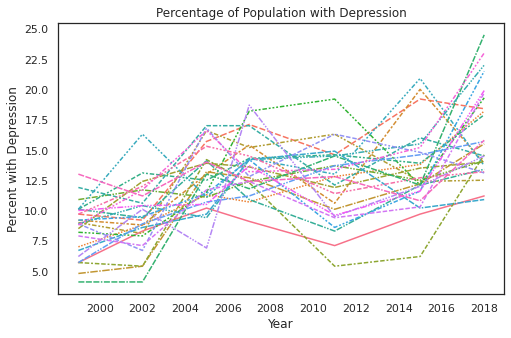

In [26]:
# Graphing Depression Rates in LA Health Districts using Seaborn lineplot and renaming axes to be more descriptive
# Setting years as indices to make graphing wideform data easier"
df4_graph = df4.iloc[:, 2:]
df4_graph.index = df4.year

# Creating figure
sns.set(style='white', font_scale=1)
plt.rcParams['figure.figsize']=(8,5)
sns.lineplot(data=df4_graph, legend=False).set(
    title="Percentage of Population with Depression", xlabel="Year", ylabel="Percent with Depression")
plt.show()

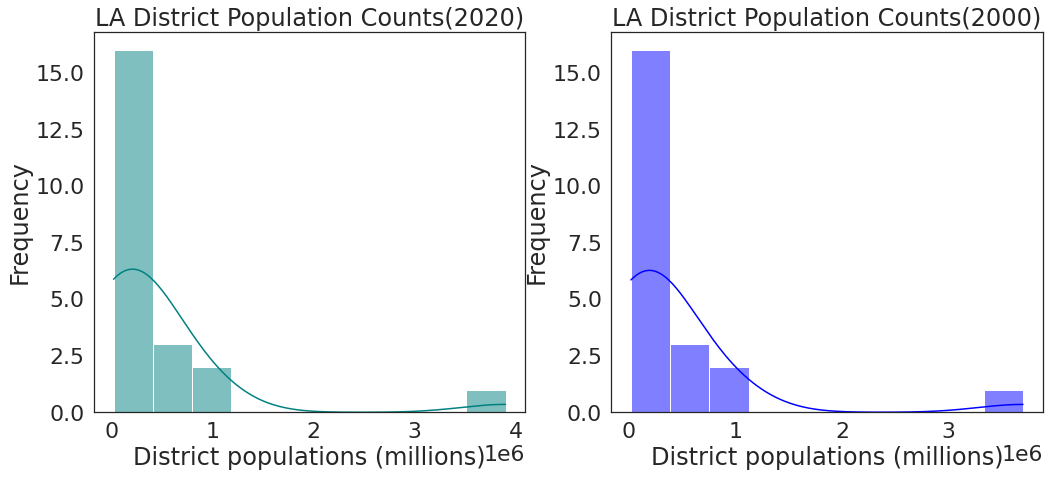

In [12]:
# Graph style and sizing
sns.set(style='white', font_scale=2)
plt.rcParams['figure.figsize']=(17,7)
sns.despine()
# Plotting 2020 and 2000 graphs side by side
plt.subplot(1,2,1)
sns.histplot(districts_health['pop_2020'],color='teal',bins=10,kde=True).set(
    title='LA District Population Counts(2020)',xlabel='District populations (millions)', ylabel='Frequency')
plt.subplot(1,2,2)
sns.histplot(districts_health['pop_2000'],color='blue',bins=10,kde=True).set(
    title='LA District Population Counts(2000)',xlabel= 'District populations (millions)', ylabel='Frequency')
plt.show()

Our histplots show that LA populations by district have a non-normal distribution skewed to the right, with most cities having less than 1 million people. The outlier is a district with over 3 million people, making it the district with the highest population density.

The histplots also show that the population has remained similar for most districts with the exception of a few that either grew or decreased in numbers. To find our outlier, we'll take a look at the district counts with a barplot.

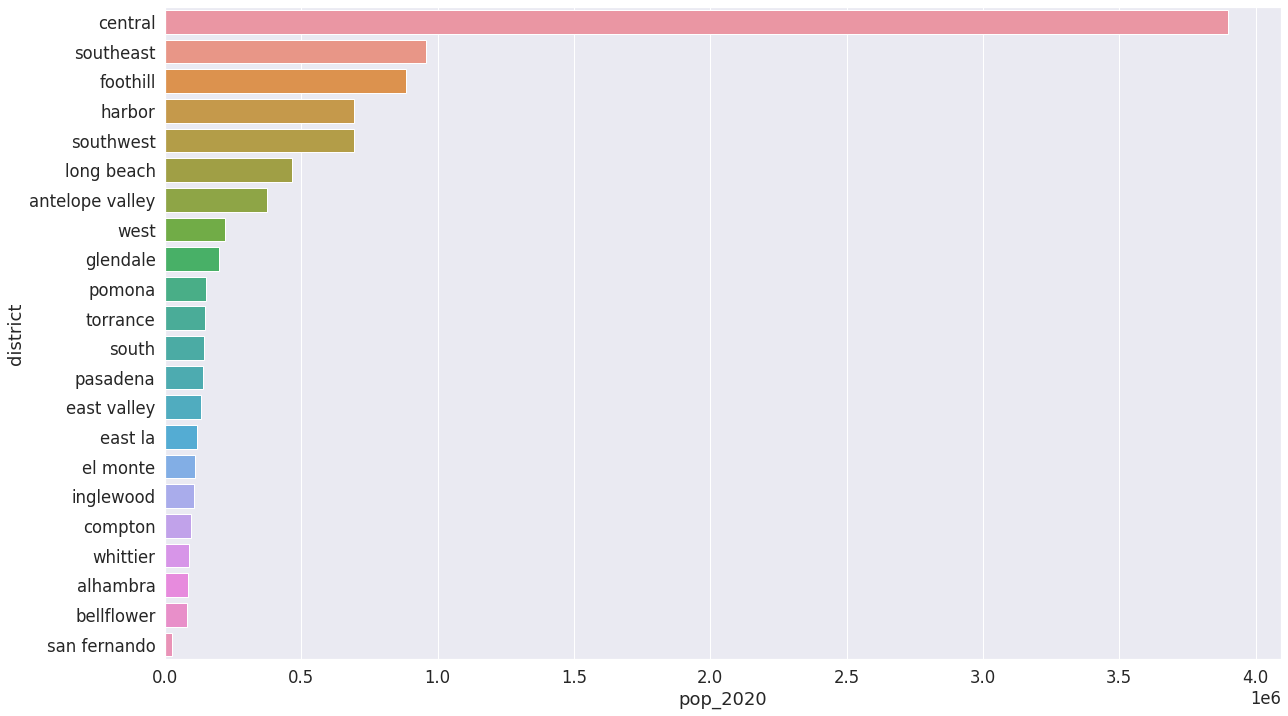

In [13]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale = 1.5)
city_cts = sns.barplot(x=districts_health['pop_2020'], y='district', data=districts_health, order=districts_health.sort_values('pop_2020',ascending=False).district)

Based on this barchart from above, we can see that Central district has the highest population count followed by Southeast, Foothill then Harbor. The least populous district is San Fernando. 

Now that we know what the most populous districts are, we'll take a look at the districts with the highest depression cases. (* Important to note that the population data is from 2020, while our mental health data goes up to 2018)
* Based on the bar chart below, we can see that Harbor, West, and Torrance have the highest depression cases.
* Central, our most populous city, is on the lower end of depression cases. 


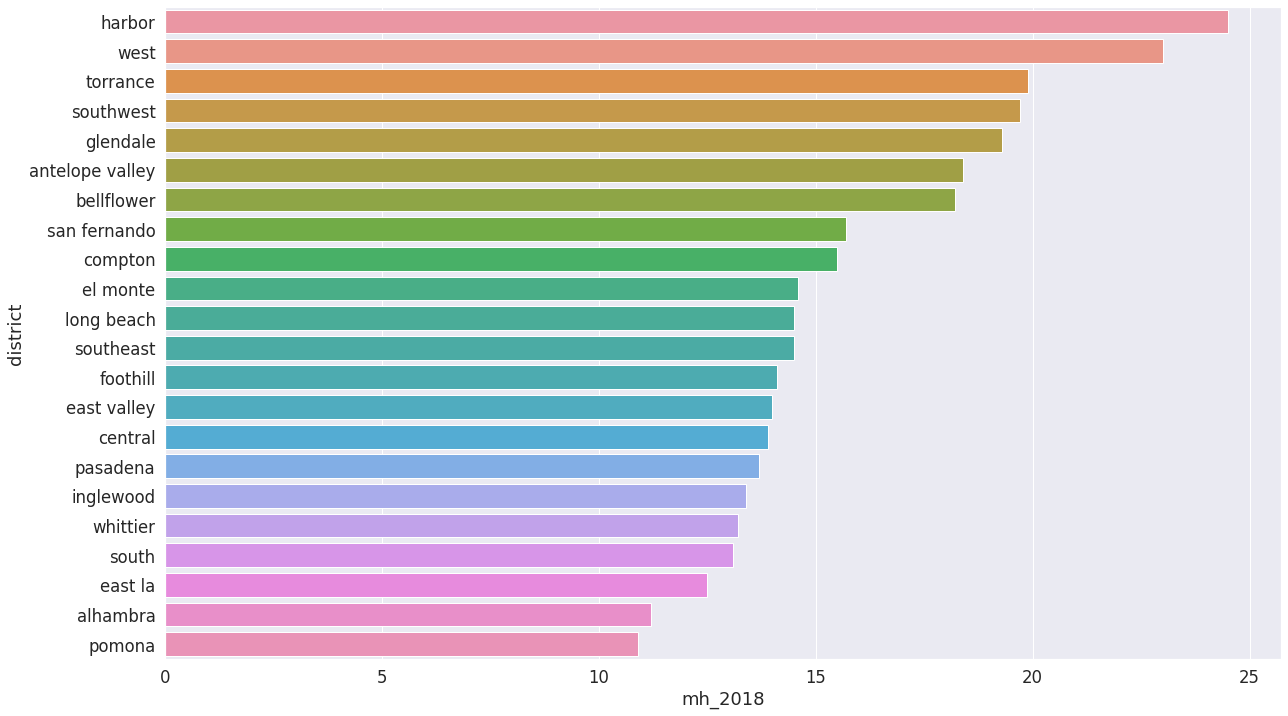

In [14]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale = 1.5)
city_cts = sns.barplot(x=districts_health['mh_2018'], y='district', data=districts_health, order=districts_health.sort_values('mh_2018',ascending=False).district)

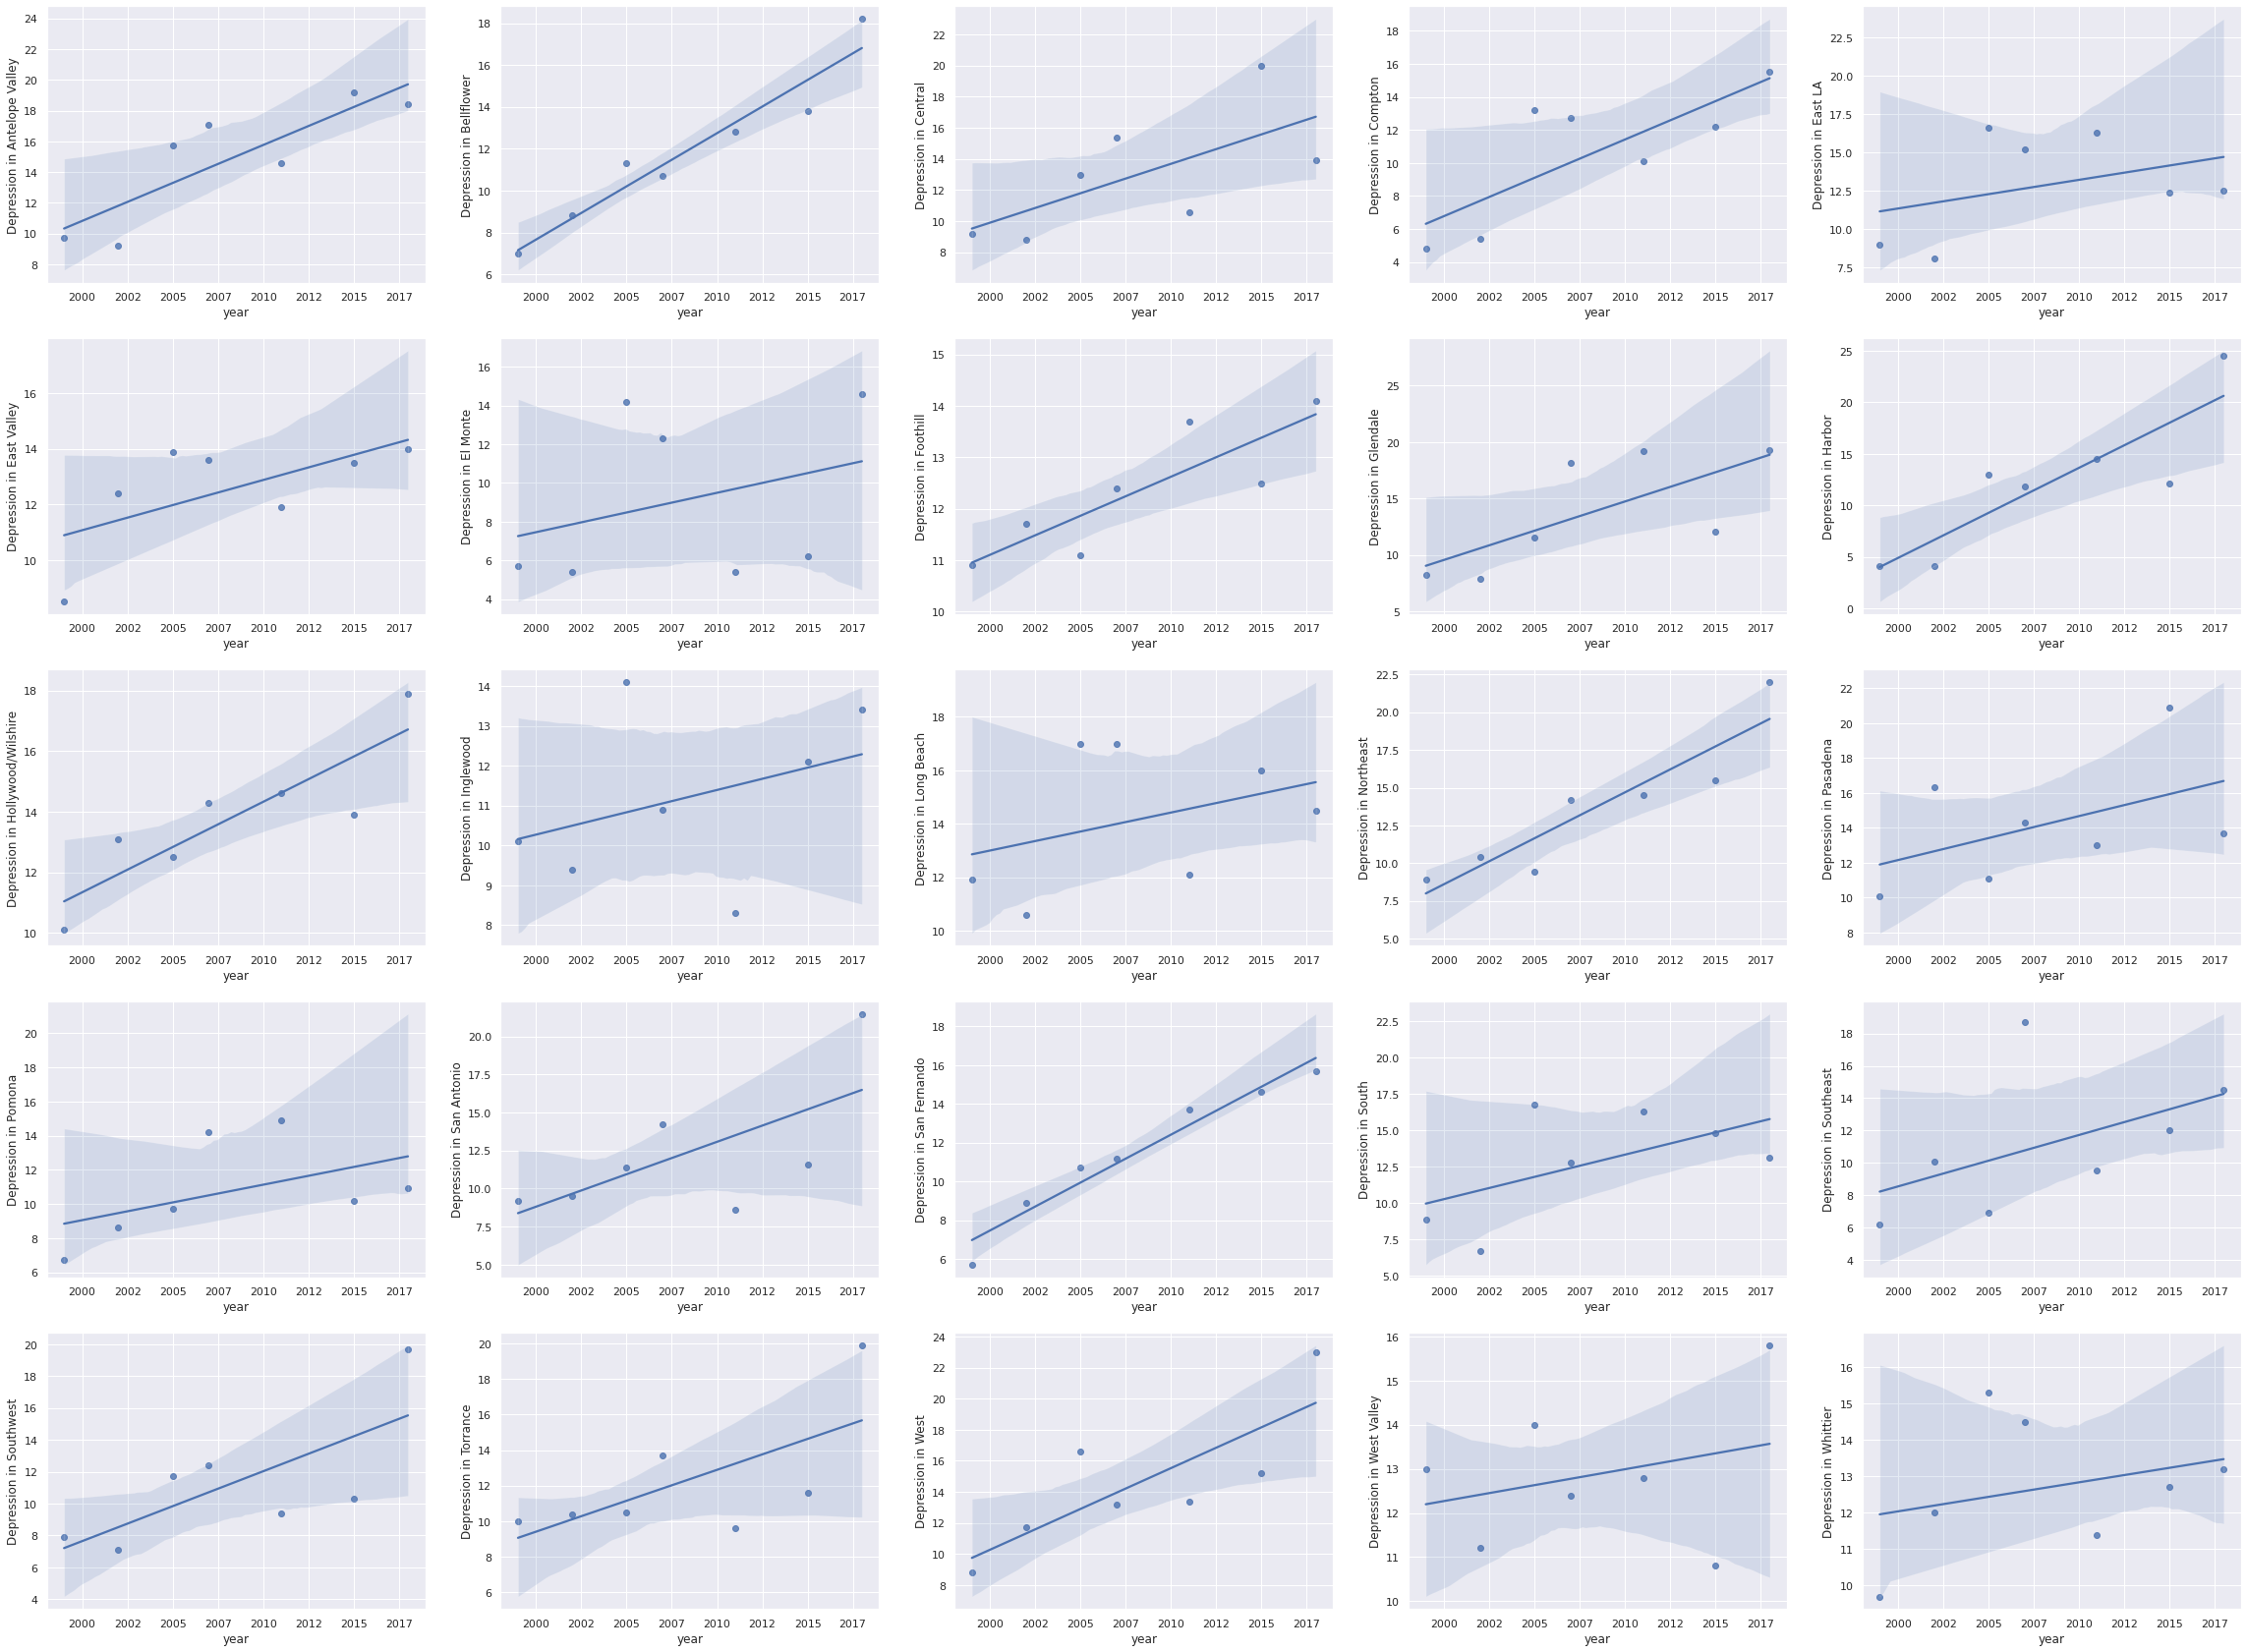

In [15]:
def remove_date(astr):
  return int(astr.replace("-01-01 00:00:00",""))

##For fun???? Delete them if no need
df4_graph = df4.drop(columns = ['LA Overall'])

#Regression line for each city by time. 
df4_graph['year'] = df4_graph['year'].astype(object).astype(str).apply(remove_date)
sns.set(rc={'figure.figsize':(40,30)})
curr = 1;
plt.figure(0)
temp = df4_graph.iloc[:, 2:]
for i in temp:
  ax = plt.subplot(5, 5, curr)
  ax = sns.regplot(x="year", y= i , data = df4_graph);
  ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
  ax.set_ylabel("Depression in " + i)
  curr = curr + 1
plt.show()


* The above figures show the regression lines for each of the LA cities with depression data. There appears to be a general positive relationship in all of LA cities depression cases, meaning they are increasing, with some being stronger than others. Bellflower, San Fernando and Northeast appear to have the strongest linear relationships with lower Standard Error, while Inglewood, El Monte, East LA and Southeast have weaker relationships and a higher Standard Error. 

In [16]:
pop_predictions = pd.DataFrame(np.array([[2018],[2015],[2011],[2007],[2005],[2002],[1999]]),columns=['year'])
RL_Cities = pd.DataFrame(columns = ['district', 'slope', 'intercept', 'r', 'p', 'std_err'])
for index, row  in districts_health.iterrows():
  district = row['district']
  mh_2018 = row['mh_2018']
  mh_2015 = row['mh_2015']
  mh_2011	= row['mh_2011']
  mh_2007= 	row['mh_2007']
  mh_2005	= row['mh_2005']
  mh_2002	= row['mh_2002']
  mh_1999	= row['mh_1999']

  #Getting regression line with current datas so that I can predict population in each city in the certain year
  y = [row['pop_2020'],row['pop_2010'],row['pop_2000'],row['pop_1990']]
  x = [2020,2010,2000,1990]
  slope, intercept, r, p, std_err = stats.linregress(x, y)

  pop_2018=	slope * 2018 + intercept
  pop_2015= slope * 2015 + intercept
  pop_2011=	slope * 2011 + intercept
  pop_2007=	slope * 2007 + intercept
  pop_2005	= slope * 2005 + intercept
  pop_2002	= slope * 2002 + intercept
  pop_1999	= slope * 1999 + intercept
  RL_Cities = RL_Cities.append({'district':district, 'slope': slope, 'intercept':intercept,'r':r, 'std_err':std_err, 'p':p	}, ignore_index=True)
  pop_predictions[district + "_Mh"] = [mh_2018,mh_2015,mh_2011,mh_2007 ,mh_2005,mh_2002,mh_1999 ]
  pop_predictions[district + "_Pop"] = [pop_2018,pop_2015,pop_2011,pop_2007 ,pop_2005,pop_2002,pop_1999 ]
pop_predictions

,year,alhambra_Mh,alhambra_Pop,antelope valley_Mh,antelope valley_Pop,bellflower_Mh,bellflower_Pop,central_Mh,central_Pop,compton_Mh,...,southeast_Mh,southeast_Pop,southwest_Mh,southwest_Pop,torrance_Mh,torrance_Pop,west_Mh,west_Pop,whittier_Mh,whittier_Pop
0,2018,11.2,83410.98,18.4,374477.0,18.2,79886.94,13.9,3891816.74,15.5,...,14.5,971117.26,19.7,695276.16,19.9,147307.86,23.0,217566.70,13.2,87469.28
1,2015,9.7,83423.85,19.2,354962.0,13.8,78211.05,20.0,3851681.30,12.2,...,12.0,964223.95,10.3,689509.95,11.6,145826.70,15.2,216253.75,12.7,86552.60
2,2011,7.1,83441.01,14.6,328942.0,12.8,75976.53,10.6,3798167.38,10.1,...,9.5,955032.87,9.4,681821.67,9.6,143851.82,13.4,214503.15,11.4,85330.36
3,2007,9.1,83458.17,17.1,302922.0,10.7,73742.01,15.4,3744653.46,12.7,...,18.7,945841.79,12.4,674133.39,13.7,141876.94,13.2,212752.55,14.5,84108.12
4,2005,10.2,83466.75,15.7,289912.0,11.3,72624.75,13.0,3717896.50,13.2,...,6.9,941246.25,11.7,670289.25,10.5,140889.50,16.6,211877.25,15.3,83497.00
5,2002,8.3,83479.62,9.2,270397.0,8.8,70948.86,8.8,3677761.06,5.4,...,10.1,934352.94,7.1,664523.04,10.4,139408.34,11.7,210564.30,12.0,82580.32
6,1999,5.7,83492.49,9.7,250882.0,7.0,69272.97,9.2,3637625.62,4.8,...,6.2,927459.63,7.9,658756.83,10.0,137927.18,8.8,209251.35,9.7,81663.64


We have data about population of each city in 2020, 2010, 2000, and 1990. By using populaton data, we used a regression line to predict population in 2018, 2015, 2011,2007,2005,2002 and 1999 in each city.
* We will save mental health rate and population predictions of each city in the variable **pop_predictions**.

* Slope, intercept ,R, p and std_err of each regression line will be saved on the variable **RL_Cities**

In [17]:
# # Scrape health districts webpage
webpage = requests.get('https://www.lacounty.hiv/health-districts/').text

# # Parse webpage HTML
html = BeautifulSoup(webpage, 'html.parser')
# # Select .icon-dl HTML class
district_links = html.select('.icon-dl')
district_names = str(html.select('[data-district]')[0].select('.district-name')[0]).split('</span>')[1]

#Open counteez.csv file
with open('counteez.csv', 'r') as districts_file:
    # Read lines from csv file
    districts = districts_file.readlines()
# Extract district names
districts = list(map(lambda district: district.split(',')[1].strip(), districts))
districts_data = list()
#Iterate over districts
for district in districts:
    # Extract text from district PDF files
    text = extract_text('district_pdfs/document_' + district.capitalize() + '.pdf')
    text = text.split('\n')
    area_square_miles = ''
    # population = ''

    # Find area for district from extracted text
    for index, line in enumerate(text):
        if 'square miles' in line:
            area_square_miles = line
            # population = text[index + 1]
            break

    area_square_miles = area_square_miles.split('s')[0].strip()
    area_square_miles = area_square_miles.replace(',', '')
    area_square_miles = int(area_square_miles)
    # population = population.split('(')[0]
    # population = population.replace(',', '')
    # population = int(population)
    districts_data.append((district, area_square_miles))

districts_data = np.array(districts_data)

FileNotFoundError: ignored

In [ ]:
df_districts = pd.DataFrame(districts_data)
# Rename columns
df_districts = df_districts.rename(columns={0: 'district', 1: 'area_square_miles'})
# Convert area_square_miles column to numeric values
df_districts['area_square_miles'] = df_districts['area_square_miles'].apply(pd.to_numeric)
# # Convert population column to numeric values
# # df_districts['population'] = df_districts['population'].apply(pd.to_numeric)
# # # Calculate population density
# # df_districts['population_density'] = df_districts['population'] / df_districts['area_square_miles']
# # Sort DataFrame in alphabetical order
df_districts = df_districts.sort_values('district', ascending=True).reset_index(drop=True)
districts_health['area_square_miles'] = df_districts['area_square_miles']
for year in range(1990, 2030, 10):
    districts_health['pop_density_{}'.format(year)] = districts_health['pop_{}'.format(year)] / districts_health['area_square_miles']
# Round decimals
districts_health = districts_health.round(decimals=1)
districts_health